# Task 2. Deep Power Analysis attack
## Training of the model remotely on Google Colab


### created: 31.01.2020

### by David Zashkolny
### 3 course, comp math
### Taras Shevchenko National University of Kyiv
### email: davendiy@gmail.com


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, BatchNormalization
from keras.layers import Dropout, Activation, GlobalMaxPooling1D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle

from keras.callbacks import ModelCheckpoint


In [3]:
def create_model(path_to_weights=''):
    """ Create the deep neural network and load its weight if 
    it is possible.
    
    
    The model is 4 1D CNN layers (with batch normalizations) and 2 dense layers.
    
    :param path_to_weights: absolute or relative path to file with keras weights
    :return: keras model
    """
    model = Sequential()
    
    model.add(Conv1D(5,          # filters
                     4,          # kernel_size
                     padding='valid', 
                     activation='relu', 
                     strides=1,
                     input_shape=(5000, 1))
             )
    model.add(BatchNormalization())
    model.add(Conv1D(5, 
                     10, 
                     padding='valid', 
                     activation='relu', 
                     strides=1)
             )
    model.add(BatchNormalization())
    model.add(Conv1D(3, 
                     15, 
                     padding='same', 
                     activation='relu', 
                     strides=10)
             )
    model.add(BatchNormalization())
    model.add(Conv1D(2, 
                     15, 
                     padding='same', 
                     activation='relu', 
                     strides=10)
             )
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(9, activation='softmax'))
    
    if path_to_weights:
        model.load_weights(path_to_weights)
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adadelta', 
                  metrics=['accuracy'])
    return model


test_model = create_model()
test_model.summary()             # print the information of the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4997, 5)           25        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4997, 5)           20        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4988, 5)           255       
_________________________________________________________________
batch_normalization_2 (Batch (None, 4988, 5)           20        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 499, 3)            228       
_________________________________________________________________
batch_normalization_3 (Batch (None, 499, 3)            12        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 2)            

In [5]:
with open("/content/drive/My Drive/Colab Notebooks/test_data2.dav", 'rb') as file:
    (x_train, y_train), (x_test, y_test) = pickle.load(file)

### Let's test our model

In [6]:
y = to_categorical(y_train[:, 2])            # changing the data to one-hot format
y_val = to_categorical(y_test[:, 2])

history = test_model.fit(x_train, y, epochs=20, batch_size=100, verbose=1,
                         validation_data=(x_test, y_val))


Train on 27000 samples, validate on 3000 samples
Epoch 1/20
 2900/27000 [==>...........................] - ETA: 1:36 - loss: 1.8878 - accuracy: 0.2286

KeyboardInterrupt: 

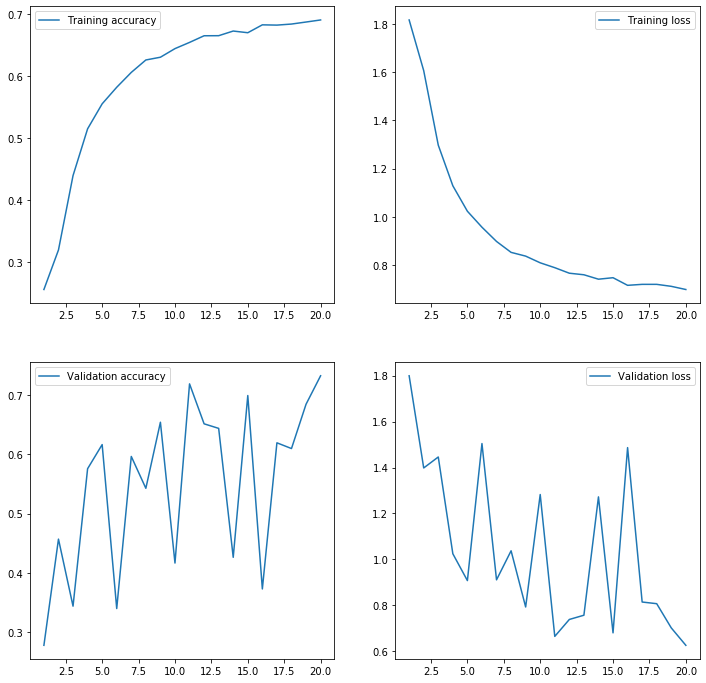

In [31]:
history_dict = history.history

epochs = np.arange(1, 21)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].plot(epochs, history_dict['acc'], label='Training accuracy')
axs[1, 0].plot(epochs, history_dict['val_acc'], label='Validation accuracy')
axs[0, 0].legend()
axs[1, 0].legend()

axs[0, 1].plot(epochs, history_dict['loss'], label='Training loss')
axs[1, 1].plot(epochs, history_dict['val_loss'], label='Validation loss')
axs[0, 1].legend()
axs[1, 1].legend()
plt.show()

### Intermediate conclusions

It's easy to notice the overfitting, because the validation accuracy is not stable. 

But the deviation of val_acc is very broad, so the value might change from 0.2 to 0.9.

Thus I decided to continue the training (~100 epochs) and save the models with best validation accuracy.

In [ ]:

# I've lost output, sorry


for i in range(16):
    y = to_categorical(y_train[:, i])
    y_val = to_categorical(y_test[:, i])

    model = create_model()

    print(f"############################ model for byte {i} ############################################")
    filepath="/content/drive/My Drive/Colab Notebooks/models/" + \
             f"byte{i}/" + \
             "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    history = model.fit(x_train, y, epochs=100, batch_size=100, callbacks=callbacks_list, verbose=0,
                         validation_data=(x_test, y_val))

### Then I decided to make retraining on extra 150 epochs for the best models

### (at that moment I had not finished yet, so in testing I used models from previous training)

In [ ]:
names = {
    0:  "weights-improvement-94-0.77.hdf5",
    1:  "weights-improvement-85-0.77.hdf5",
    2:  "weights-improvement-93-0.84.hdf5",
    3:  "weights-improvement-100-0.81.hdf5",
    4:  "weights-improvement-85-0.72.hdf5",
    5:  "weights-improvement-94-0.96.hdf5",
    6:  "weights-improvement-29-0.81.hdf5",
    7:  "weights-improvement-91-0.87.hdf5",
    8:  "weights-improvement-98-0.71.hdf5",
    9:  "weights-improvement-92-0.84.hdf5",
    10: "weights-improvement-97-0.83.hdf5",
    11: "weights-improvement-89-0.91.hdf5",
    12: "weights-improvement-100-0.70.hdf5",
    13: "weights-improvement-94-0.78.hdf5",
    14: "weights-improvement-94-0.86.hdf5",
    15: "weights-improvement-29-0.84.hdf5",
}

models = [create_model(f'/content/drive/My Drive/Colab Notebooks/models/byte{i}/{names[i]}') 
            for i in range(16)]

In [0]:

for i in range(16):
    y = to_categorical(y_train[:, i])
    y_val = to_categorical(y_test[:, i])

    model = models[i]

    print(f"############################ model for byte {i} ############################################")
    filepath="/content/drive/My Drive/Colab Notebooks/models_100_plus_add/" + \
             f"byte{i}/" + \
             "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    history = model.fit(x_train, y, epochs=150, batch_size=100, callbacks=callbacks_list, verbose=0,
                         validation_data=(x_test, y_val))

############################ model for byte 0 ############################################

Epoch 00001: val_acc improved from -inf to 0.50733, saving model to /content/drive/My Drive/Colab Notebooks/models_100_plus_add/byte0/weights-improvement-01-0.51.hdf5

Epoch 00002: val_acc improved from 0.50733 to 0.72400, saving model to /content/drive/My Drive/Colab Notebooks/models_100_plus_add/byte0/weights-improvement-02-0.72.hdf5

Epoch 00003: val_acc improved from 0.72400 to 0.76200, saving model to /content/drive/My Drive/Colab Notebooks/models_100_plus_add/byte0/weights-improvement-03-0.76.hdf5

Epoch 00004: val_acc did not improve from 0.76200

Epoch 00005: val_acc did not improve from 0.76200

Epoch 00006: val_acc did not improve from 0.76200

Epoch 00007: val_acc did not improve from 0.76200

Epoch 00008: val_acc did not improve from 0.76200

Epoch 00009: val_acc improved from 0.76200 to 0.76667, saving model to /content/drive/My Drive/Colab Notebooks/models_100_plus_add/byte0/weight